# AlexNet Implementation in Pytorch


[Research Paper Link](https://proceedings.neurips.cc/paper_files/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf)

![AlexNet Architecture](https://raw.githubusercontent.com/blurred-machine/Data-Science/master/Deep%20Learning%20SOTA/img/alexnet2.png)

## Setting Up the Project Directory in Google Drive

In [1]:
%cd /content/drive/MyDrive/Datasets/Flowers Dataset

/content/drive/MyDrive/Datasets/Flowers Dataset


In [2]:
!pwd

/content/drive/MyDrive/Datasets/Flowers Dataset


## Imports

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader

## Dataset Image Transformations

In [4]:
# Define transformations for the dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to match AlexNet input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

## Loading the dataset

In [5]:
# Load Flowers dataset (Assuming it's available in a directory structure)
dataset_path = "/content/drive/MyDrive/Datasets/Flowers Dataset"
train_dataset = torchvision.datasets.ImageFolder(root=dataset_path + "/train", transform=transform)
test_dataset = torchvision.datasets.ImageFolder(root=dataset_path + "/test", transform=transform)

In [6]:
# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

### Dataset Info

In [7]:
# Get dataset information
def dataset_info(loader, dataset_name="Dataset"):
    print(f"Dataset: {dataset_name}")
    print(f"Total samples: {len(loader.dataset)}")  # Total number of images

    # Get a single batch of data
    images, labels = next(iter(loader))
    print(f"Batch size: {images.shape[0]}")
    print(f"Image shape: {images.shape}")  # Shape of images (batch_size, channels, height, width)
    print(f"Unique classes: {set(labels.numpy())}")  # Unique labels in the batch
    print(f"Total classes: {len(set(labels.numpy()))}")  # Number of classes

# Call the function for train and test sets
dataset_info(train_loader, "Training Set")

Dataset: Training Set
Total samples: 1275
Batch size: 32
Image shape: torch.Size([32, 3, 224, 224])
Unique classes: {0, 1}
Total classes: 2


## Model Training

In [8]:
# Training the model
def train(num_epochs=10):
    train_losses, train_accuracies = [], []
    for epoch in range(num_epochs):
        model.train()
        running_loss, correct, total = 0.0, 0, 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
        epoch_loss = running_loss / len(train_loader)
        epoch_acc = 100. * correct / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)
        print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%")
    return train_losses, train_accuracies

## AlexNet Model Architecture

In [9]:
# Define the AlexNet model
class AlexNet(nn.Module):
    def __init__(self, num_classes=2):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

## Model, Loss Function & Optimizer

In [10]:
# Instantiate model, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AlexNet(num_classes=2).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

## Model Evaluation

In [11]:
# Evaluation function
def evaluate():
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    accuracy = 100. * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')
    return accuracy

## Model Inferencing

In [12]:
# Inference function
def predict(image_path):
    from PIL import Image
    image = Image.open(image_path)
    image = transform(image).unsqueeze(0).to(device)
    model.eval()
    with torch.no_grad():
        output = model(image)
        _, predicted = output.max(1)
    print(f'Predicted Class: {predicted.item()}')
    return predicted.item()

## Visualization of Loss & Accuracy

In [13]:
# Visualization of loss and accuracy
def plot_metrics(train_losses, train_accuracies):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Training Accuracy', color='green')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.show()

##################################################
Training Started
Epoch 1, Loss: 0.9362, Accuracy: 58.04%
Epoch 2, Loss: 0.6144, Accuracy: 60.94%
Training Completed
##################################################
Model Evaluation Started
Test Accuracy: 71.98%
Model Evaluation Started
##################################################
Plotting the metrics


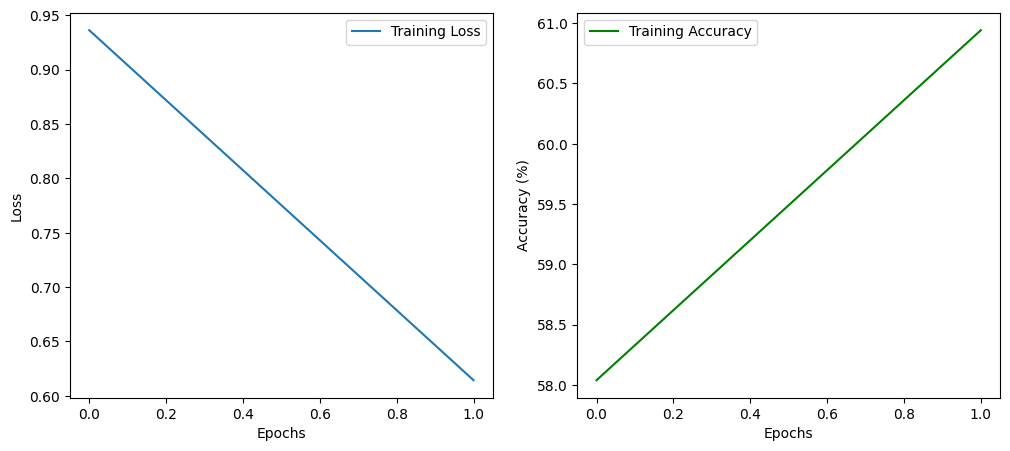

In [14]:
# Run training, evaluation, and plot results
print('#' * 50)
print('Training Started')
train_losses, train_accuracies = train(num_epochs=2)
print('Training Completed')
print('#' * 50)
print('Model Evaluation Started')
evaluate()
print('Model Evaluation Started')
print('#' * 50)
print('Plotting the metrics')
plot_metrics(train_losses, train_accuracies)

In [15]:
predict('/content/drive/MyDrive/Datasets/Flowers Dataset/test/dandelion/1297972485_33266a18d9_jpg.rf.27db91a578818f7158d6d5d98dbfdc8a.jpg')

Predicted Class: 1


1

In [16]:
predict('/content/drive/MyDrive/Datasets/Flowers Dataset/test/daisy/12193032636_b50ae7db35_n_jpg.rf.e6c4eeb71c56e793a0d85f6d979dbe20.jpg')

Predicted Class: 0


0